In [1]:
#6.3Fashion MNIST with CNN
#6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_X,train_y),(test_X,test_y) = fashion_mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0

In [6]:
#reshape이전
print(train_X.shape,test_X.shape)
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
#reshape이후
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


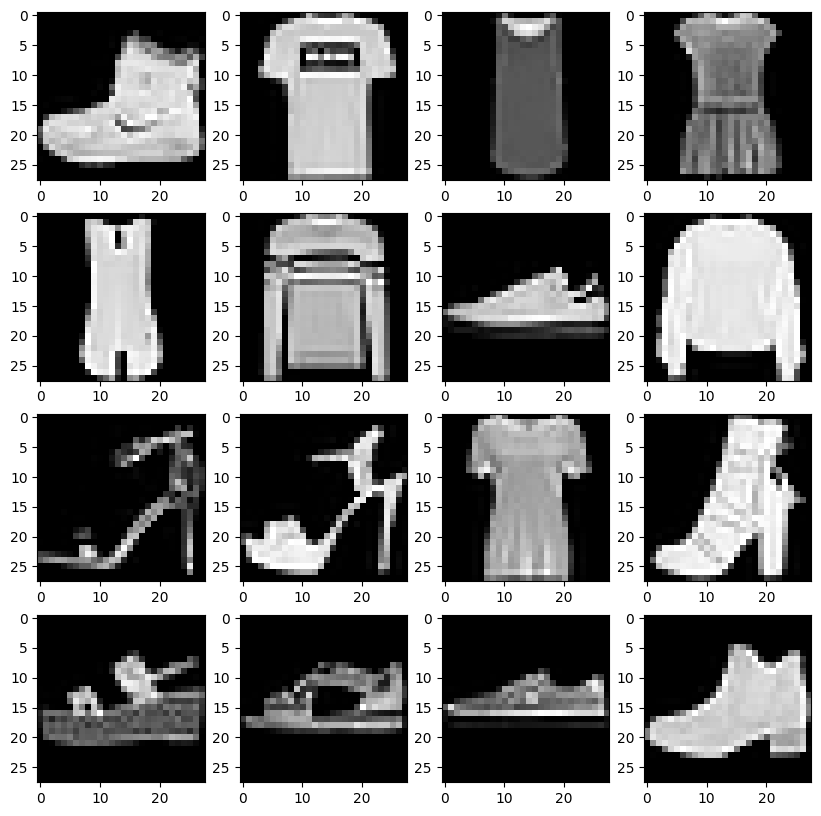

In [7]:
#6.6테이터 확인
import matplotlib.pyplot as plt
#전체 그래프의 사이즈를 width=10, height=10으로 지정합니다.
plt.figure(figsize=(10,10))
for c in range(16):
    #4행 4열로 지정한 grid에서 c+1 번째 칸에 그래프를 그립니다. 1~16
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28),cmap='gray')

In [9]:
#6.7Fashion MNIST 분류 컨블루션 신경망 모델 정의
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=[28,28,1],kernel_size=(3,3),filters=16),
    keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3989642 (15.22 MB)
Trainable params: 39896